In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from src.preprocess_data import create_df, process_train_df, get_id_to_elo_rating_dict

In [67]:
df = create_df("../data/games.csv")
df["p1_outcome"] = (1 + df["p1_score"] * 2).astype(int)

train = df.loc[df["date"] < "2019-01-01"]
test = df.loc[df["date"] >= "2019-01-01"]

In [74]:
cols = ["p1_elo", "p2_elo"]
clf = RandomForestClassifier(max_depth=2, n_estimators=25)
clf.fit(train[cols].values, np.array(train["p1_outcome"].values))

RandomForestClassifier(max_depth=2, n_estimators=25)

In [75]:
ypred = clf.predict_proba(test[cols].values)
ypred_cls = np.argmax(ypred, axis=1) + 1

# Train
ypred_train = clf.predict_proba(train[cols].values)
ypred_cls_train = np.argmax(ypred_train, axis=1) + 1

In [76]:
np.mean(np.abs(test["p1_outcome"].values - ypred_cls) == 0)

0.5311778290993071

In [77]:
np.mean(np.abs(test["p1_outcome"].values - ypred_cls) == 1)

0.4665127020785219

In [78]:
np.mean(np.abs(test["p1_outcome"].values - ypred_cls) == 2)

0.0023094688221709007

In [79]:
np.mean(np.abs(train["p1_outcome"].values - ypred_cls_train) == 0)

0.5417901600474214

In [80]:
np.mean(np.abs(train["p1_outcome"].values - ypred_cls_train) == 1)

0.44991108476585656

In [81]:
np.mean(np.abs(train["p1_outcome"].values - ypred_cls_train) == 2)

0.008298755186721992

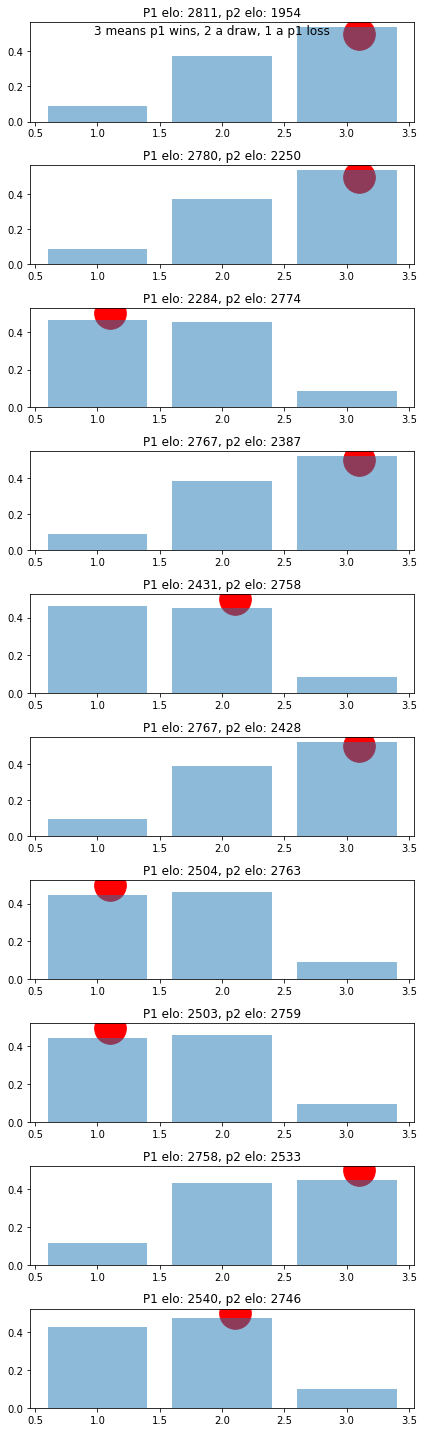

In [82]:
plot_n = 10
reverse = False

fig, ax = plt.subplots(plot_n, 1, figsize=(6, 20))
ax = ax.ravel()

for i in range(plot_n):
    ax[i].scatter(
        test["p1_outcome"].values[i] + 0.1, 0.5, color="red", s=1000
    )
    ax[i].bar(range(1, 4), ypred[i, :], alpha=0.5)
    ax[i].set_title(
        f"P1 elo: {test['p1_elo'].values[i]:.0f}, p2 elo: {test['p2_elo'].values[i]:.0f}"
    )
plt.tight_layout()
plt.suptitle("3 means p1 wins, 2 a draw, 1 a p1 loss");